# Entregável 1 - visão computacional

In [131]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.1 


# Equalização de histograma

In [132]:
rintin = cv2.imread("RinTinTin.jpg")

In [133]:
rintin.shape

(240, 320, 3)

In [134]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [135]:
rintin_gray.shape

(240, 320)

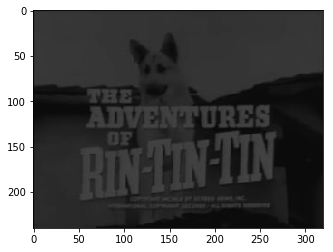

In [136]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

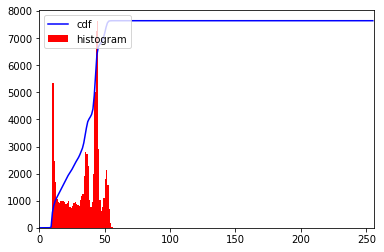

In [137]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

#### 1. Não aproveita bem as faixas de cores. [(0 - 55) e não (0-255)]

In [138]:
#2
img = rintin_gray.copy()

def replace(x):
    return ((255*x)/50) - 40.8
#(deltay/deltax e coeficiente linear)


for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        img[i][j] = replace(rintin_gray[i][j])
        

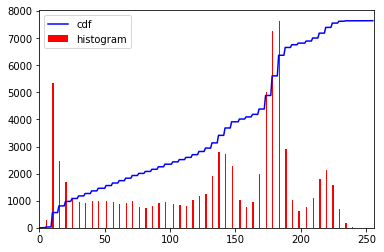

In [145]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

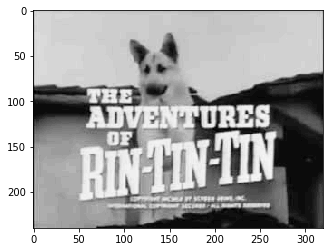

In [139]:
#3
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


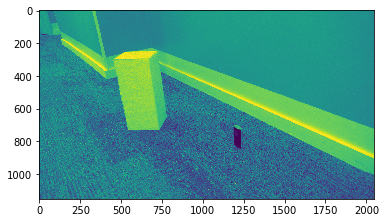

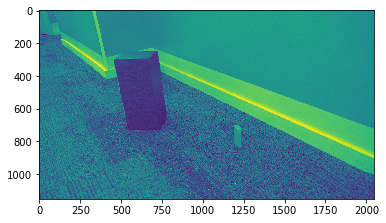

In [140]:
#1
sala = cv2.imread("hall_box_battery1.jpg")

#b, g, r = cv2.split(sala)


#plt.hist(b)
#plt.show()
salargb = cv2.cvtColor(sala, cv2.COLOR_BGR2RGB)
sala_r = salargb[:,:,0]
plt.figure(1)
plt.imshow(sala_r)

sala_b = salargb[:,:,1]
plt.figure(2)
plt.imshow(sala_b)

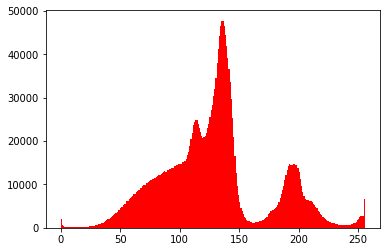

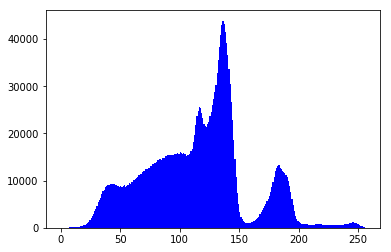

<Figure size 432x288 with 0 Axes>

In [141]:
#1
plt.hist(sala_r.flatten(),256,[0,256], color = 'r')
plt.figure(1)
plt.show()

plt.hist(sala_b.flatten(),256,[0,256], color = 'b')
plt.figure(2)
plt.show()

#### 1. A partir da análise dos canais por imagem, é perceptível que a cor vermelha se confunde com a cor branca do rodapé. Nos histogramas isso já é mais amenizado, gerando algumas possíveis conclusões do que seriam os objetos.

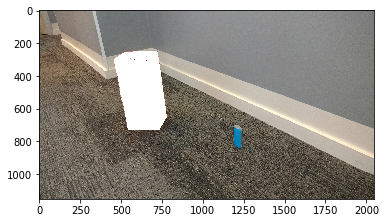

In [142]:
sala2 = salargb.copy()
for i in range(sala.shape[0]):
    for j in range(sala.shape[1]):
        if int(sala_r[i][j]) - int(sala_b[i][j]) > 100 and int(sala_r[i][j]) - int(sala_b[i][j]) < 180:
            sala2[i][j] = [255, 255, 255]
            
plt.imshow(sala2)
        

## Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele.

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

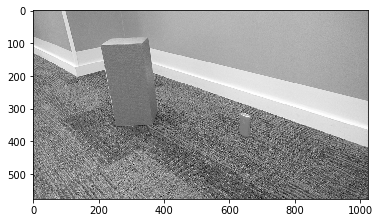

In [143]:
sala3 = cv2.imread("hall_box_battery_atividade3.png")
salag = cv2.cvtColor(sala3, cv2.COLOR_BGR2GRAY)

plt.imshow(salag, cmap="Greys_r", vmin=0, vmax=255)
        

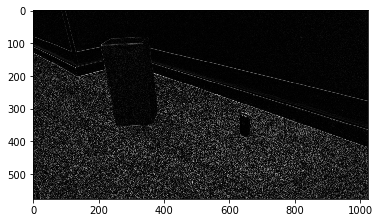

In [144]:
salag2 = salag.copy()
height, width = salag.shape
for i in range(1, height-1):
    for j in range(1, width-1):    
        salag2[i][j] = abs(int(salag[i+1][j]) - int(salag[i-1][j]))
        
plt.imshow(salag2, cmap="Greys_r", vmin=0, vmax=255);